___

# Atividade - Regressão Linear Múltipla

## Aula 24

___

<div id="indice"></div>

## Índice

- [Consumo de combustível em milhas por galão](#dataset)
    - [Passo 1: Ajustando o modelo](#passo1)
    - [Passo 2: Verificando os resultados dos testes de hipótese](#passo2)
    - [Passo 3: Visualizando o modelo e os dados (com duas variáveis explicativas)](#passo3)
- [Atividade](#atividade)
    - [Exercício 1](#ex1)
    - [Exercício 2](#ex2)
    - [Exercício 3](#ex3)
    - [Exercício 4](#ex4)
    - [Exercício 5](#ex5)
- [Referências](#referencias)

___

<div id="dataset"></div>

# Consumo de combustível em milhas por galão

A atividade a realizar está no final, mas estude todo o *notebook*

In [21]:
# TIRAR # PARA ROTACIONAR GRÁFICO 3D
%matplotlib notebook
%reset -f


import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

Vamos fazer uma análise exploratória sobre um dataset sobre carros.

Fonte: [Auto MPG dataset](http://archive.ics.uci.edu/ml/datasets/Auto+MPG)

<div id="regress"></div>

In [22]:
### Função utilitária para fazer a regressão com constante adicionada

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [23]:
data = pd.read_csv("auto_mpg_sub.csv")

**Dicionário de dados:**


Variável | Descrição
:---:|---:
mpg | consumo em miles per gallon
cylinders | número de cilindros do motor do carro
displacement | deslocamento dos cilindros em polegadas cúbicas
horsepower | potência do veículo (HP)
weight | peso do veículo (libras)
acceleration | aceleração do veículo
model year | ano do modelo
origin | origem - veja abaixo
car name | nome do carro

A variável *origin* identifica o país de origem de um veículo

Valor | Origem
:---:|:---:
1 | Estados Unidos da América
2 | Europa
3 | Japão

In [24]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

**Vamos trabalhar apenas com as variáveis quantitativas desse dataset**

In [25]:
df = data[['mpg', 'cylinders', 'displacement', 'horsepower', 
           'weight', 'acceleration', 'model year']]

In [26]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Verificando valores nulos.

In [27]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
dtype: int64

___


In [28]:
import seaborn as sns

<IPython.core.display.Javascript object>


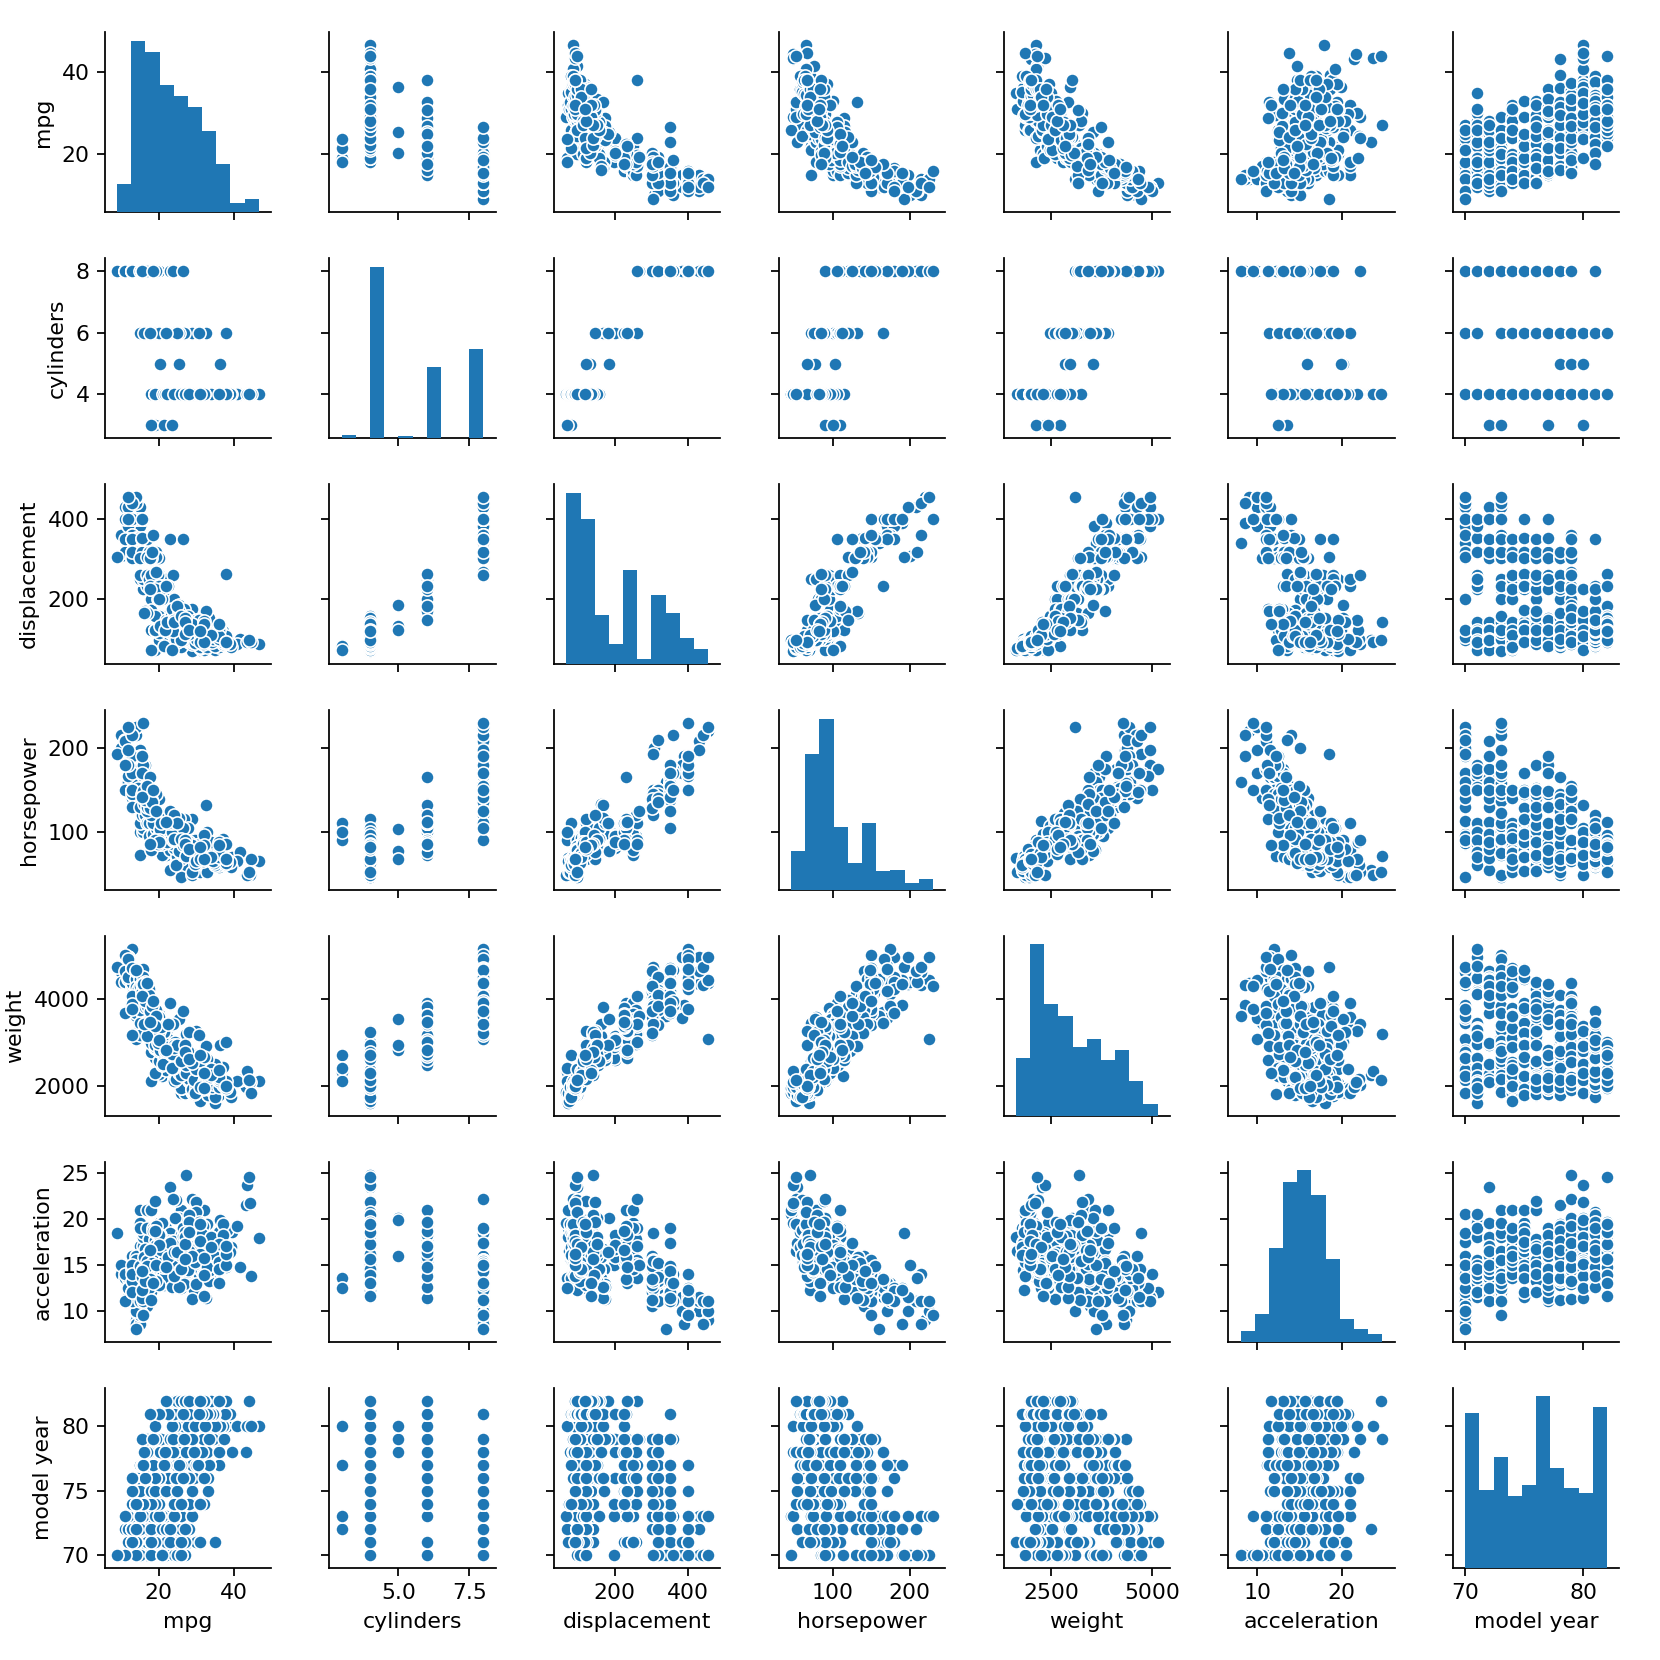

In [29]:
sns.pairplot(df, height=1.5);

___

<div id="passo1"></div>

### Passo 1: Ajustando o modelo

Ajuste um modelo considerando Consumo como resposta (dependente) e as demais variáveis da base de dados como explicativas!

Faça a separação das variáveis resposta e preditoras (explicativas):

In [30]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year']]
Y = df['mpg']

Faça uso da função [`regress`](#regress) (que está neste *notebook* ) para fazer o ajuste:

In [31]:
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Thu, 12 Nov 2020   Prob (F-statistic):          3.79e-135
Time:                        15:25:24   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.5353      4.764     -3.051      0.002     -23.902      -5.169
cylinders       -0.3299      0.332     -0.993      0.321      -0.983       0.323
displacement     0.0077      0.007      1.044      0.297      -0.007       0.022
horsepower      -0.0004      0.014     -0.028      0.977      -0.028       0.027
weight          -0.0068      0.001    -10.141      0.000      -0.008      -0.005
acceleration     0.0853      0.102      0.836      0.404      -0.115       0.286
model year       0.7534      0.053     14.318      0.000       0.650       0.857
==============================================================================
Omnibus:                       37.865   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.248
Skew:                           0.630   Prob(JB):                     8.26e-14
Kurtosis:                       4.449   Cond. No.                     8.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

___

<div id="passo2"></div>

### Passo 2: Verificando os resultados dos testes de hipótese

O que os valores $P > |t|$ dizem a respeito das variáveis preditoras usadas?


**R.:**

A coluna $P > |t|$ obtida do comando `results.summary()` refere-se ao valor *p* de cada variável explicativa utilizada para ajudar a compreender o comportamento da variável dependente `mpg` no caso do exemplo.

No caso da regressão múltipla obtida no exemplo, das seis variáveis explicativas, apenas duas se mostram relevantes para explicar a variável `mpg` pois possui valor *p* menor do que 10% (maior nível de significância usualmente adotado na prática).
Entretanto, como há muitas variáveis explicativas, o correto é utilizar algum método de seleção de variáveis. Em modelo de regressão linear, quando há suposição de erros normais, pode-se utilizar o método Stepwise. Vide alguns comentários de como fazê-lo no `Python´.

https://stackoverflow.com/questions/15433372/stepwise-regression-in-python

https://stackoverflow.com/questions/48071753/selecting-the-best-combination-of-variables-for-regression-model-based-on-reg-sc

___

<div id="passo3"></div>

### Passo 3: Visualizando o modelo e os dados (com duas variáveis explicativas)

Observe como plotar os resultados de uma regressão múltipla quando há duas variáveis explicativas:

In [32]:
# Obtém a regressão
X3 = df[['cylinders', 'acceleration']]
results3 = regress(Y,X3)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     299.1
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           2.14e-79
Time:                        15:25:29   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2363.
Df Residuals:                     389   BIC:                             2375.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           40.5704      2.247     18.052      0.000      36.152      44.989
cylinders       -3.4624      0.169    -20.526      0.000      -3.794      -3.131
acceleration     0.1172      0.104      1.124      0.262      -0.088       0.322
==============================================================================
Omnibus:                       33.933   Durbin-Watson:                   1.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.359
Skew:                           0.658   Prob(JB):                     2.33e-10
Kurtosis:                       3.992   Cond. No.                         151.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Recupera os parâmetros calculados
beta0_hat = results3.params[0]  # const
beta1_hat = results3.params[1]  # cylinders
beta2_hat = results3.params[2]  # acceleration

In [34]:
# Define uma função que aplica aos parâmetros
def f(feature1, feature2):
    return beta0_hat + beta1_hat*feature1 + beta2_hat*feature2

In [35]:
# Gera 100 pontos entre os menores e maiores valores de cada feature
npoints = 100
feature1 = X3["cylinders"]
feature2 = X3["acceleration"]
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)


In [36]:
# Constrói uma grade de 100x100 pontos 
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)

In [37]:
# Aplica a função em cada ponto da grade 
# Constrói plano estimado
fit_z = f(eixo_x, eixo_y)

<IPython.core.display.Javascript object>


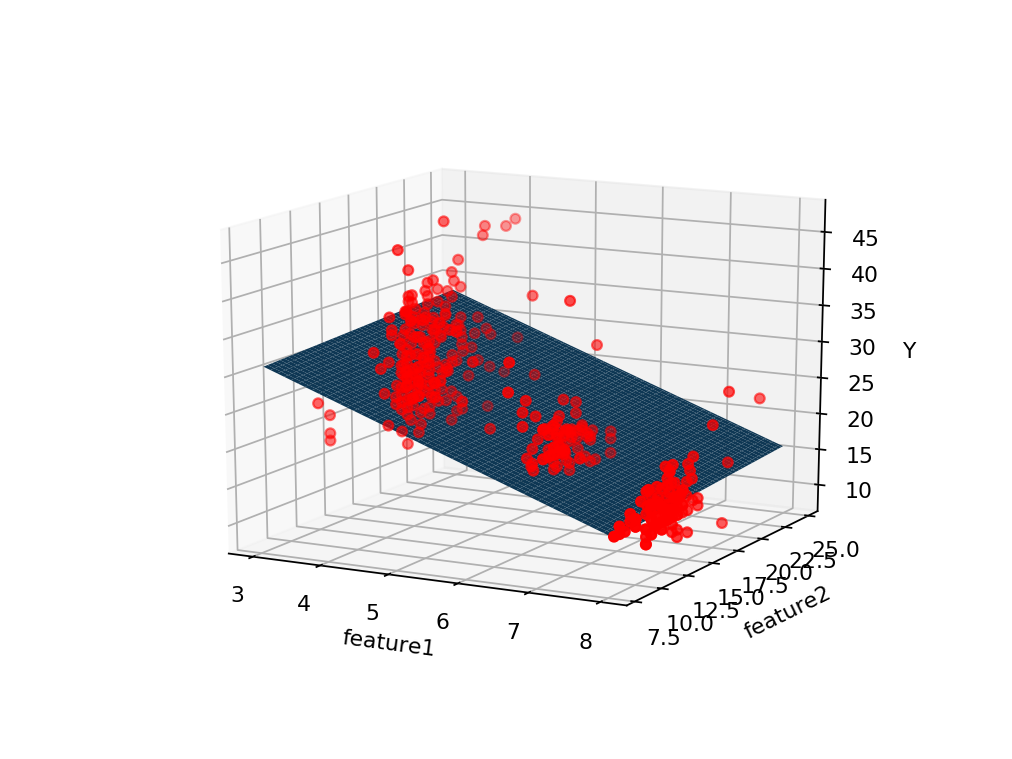

In [38]:
# Plota os pontos e o plano em 3D
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z)
plt3d.scatter(feature1, feature2, Y, color="r")
plt3d.set_xlabel("feature1")
plt3d.set_ylabel("feature2")
plt3d.set_zlabel("Y")
plt.show()

___

<div id="atividade"></div>

## Atividade

Parece que as variáveis `cylinders` e `acceleration` não são as melhores escolhas para explicar a economia de combustível.

Encontre $2$ variáveis melhores, gere o modelo via `OLS` e realize o plot 3D. Esse objetivo será atingido ao completarmos os exercícios a seguir.

<div id="ex1"></div>

### EXERCÍCIO 1

Para encontrar as duas melhores variáveis que explicam a variável `mpg`, vamos aplicar o método *Backward Stepwise*. Esse método consiste em começar utilizando todas as variáveis disponíveis na regressão e remover as menos úteis para a explicação, de uma em uma, até sobrarem apenas duas. Para iniciar esse processo, ajuste um modelo linear com todas as variáveis disponíveis. **Dica**: isso já foi feito anteriormente nesta atividade e armazenado em uma variável. Você pode utilizar o mesmo resultado aqui.

In [ ]:
# ESCREVA SEU CÓDIGO AQUI:



<div id="ex2"></div>

### EXERCÍCIO 2

Remova a variável com maior valor-p desde que não significante, ou seja, desde que seja maior do que o nível de significância (nesse caso, 10%)! No caso, verá que será removida a variável `horsepower`. Faça um novo ajuste de regressão sem essa variável! 

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

<div id="ex3"></div>

### EXERCÍCIO 3

Do novo ajuste, verá que a variável `cylinders` possui maior valor-p > 10%. Faça novo ajuste sem essa variável. E assim sucessivamente até que todas as variáveis no modelo final tenham valor-p abaixo do nível de significância adotado (10%).

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

<div id="ex4"></div>

### EXERCÍCIO 4

Na prática, em cada passo para remoção de uma variável é necessário avaliar a validade das suposições do modelo. Por questão de tempo, nesta atividade vamos fazer a análise detalhada das suposições do modelo apenas com o modelo final.

Utilizando os resultados da regressão com duas variáveis (modelo final), discuta as suposições do modelo.

**Atenção:** Para discutir a suposição de independência dos erros considerando o teste Durbin-Watson, veja [aqui](https://www.statology.org/durbin-watson-test-python/).

In [ ]:
# ESCREVA SUA RESPOSTA AQUI

<div id="ex5"></div>

### EXERCÍCIO 5

Faça o plot 3D com as duas variáveis relevantes para explicar a variável `mpg`. Note que podemos fazer isso apenas porque ambas possuem valor *p* < 10%.

In [ ]:
# ESCREVA SEU CÓDIGO AQUI

**OBSERVAÇÃO**

Note que se o modelo final ficasse com mais do que duas variáveis preditoras com valor *p* < 10%, então um gráfico 3D não seria adequado e nem informativo para conseguir avaliar o modelo ajustado sob os pontos!!

# Referências

1. Montogmery e Runger. Capítulo 12 - Regressão linear Múltipla
1. Magalhães e Lima, seção 9.5. Regressão Linear Simples
1. http://www.statsmodels.org/dev/diagnostic.html
1. [http://connor-johnson.com/2014/02/18/linear-regression-with-python/](http://connor-johnson.com/2014/02/18/linear-regression-with-python/)
